<a href="https://colab.research.google.com/github/papillonbee/ski/blob/master/ski_0_0_27.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ski

In [0]:
from ski import ski

In [0]:
ski.set_params(sales=3,wholesale=5,retail=7,r=.1,alpha=1/(1+.1),N=7,M=20,lam=10)

## Solve with MDP

In [0]:
sol = ski.solve()

In [5]:
sol.reward[(1,0)]

{0: 25.0826294305045,
 1: 25.991637794268566,
 2: 26.899820704764224,
 3: 27.80387634891784,
 4: 28.694174438597976,
 5: 29.550078642094405,
 6: 30.337195073223448,
 7: 31.009665217073476,
 8: 31.51835495052493,
 9: 31.82231917097817,
 10: 31.898810599211213,
 11: 31.74782300356383,
 12: 31.389971106000615,
 13: 30.859387245017146,
 14: 30.194701153898137,
 15: 29.43089402583,
 16: 28.59370378987264,
 17: 27.697161043801337,
 18: 26.74408134560035,
 19: 25.72884147283144,
 20: 24.641410945664873}

In [6]:
sol.opt_reward[(1,0)]

31.898810599211213

In [7]:
sol.opt_action[(1,0)]

10

## Solve with MC

In [0]:
ski.mc.initialize()

28.32035961326702 9
[(9, 7466), (8, 338), (13, 135), (16, 132), (10, 129), (6, 128), (5, 126), (14, 125), (17, 123), (1, 120), (19, 117), (7, 115), (4, 115), (20, 113), (12, 113), (15, 112), (11, 108), (0, 106), (2, 100), (3, 92), (18, 87)]
29.155893412587417 9
[(9, 16846), (8, 367), (13, 163), (16, 163), (5, 162), (10, 161), (6, 158), (4, 155), (14, 155), (1, 153), (17, 150), (15, 148), (19, 147), (12, 144), (7, 144), (20, 139), (2, 139), (0, 137), (11, 135), (18, 117), (3, 117)]
29.522289563125078 9
[(9, 26481), (8, 387), (13, 188), (5, 185), (16, 183), (10, 180), (1, 176), (6, 174), (17, 171), (4, 171), (14, 169), (20, 164), (12, 162), (19, 161), (7, 161), (15, 158), (0, 158), (11, 151), (2, 150), (18, 135), (3, 135)]
29.742825273091498 9
[(9, 36210), (8, 401), (13, 205), (5, 201), (16, 199), (10, 195), (6, 192), (1, 188), (17, 184), (4, 181), (14, 179), (12, 178), (20, 176), (7, 175), (0, 171), (15, 170), (19, 169), (11, 168), (2, 160), (18, 152), (3, 146)]
29.883015727880018 9
[(9

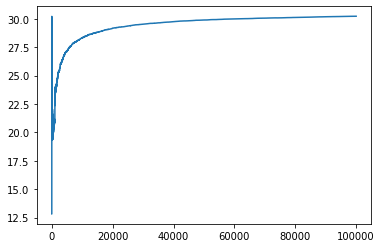

In [12]:
for j in range(10):
  sol = ski.solve(method='mc',keep_result=True,epsilon_greedy='decayed',seed=1234)
  
  print(sol.opt_reward[(1,0)],sol.opt_action[(1,0)])

  visit = sol.visit[(1,0)]
  visit = [(key,visit[key]) for key in visit]
  visit.sort(key=lambda x: x[1],reverse=True)
  print(visit)

i = max([i for i in range(len(sol.y))],key=lambda i: sol.y[i])
print(i)
print(sol.y[i])
print(sol.a[i])

sol.plot()

## Solve with SARSA

In [0]:
ski.td.initialize()

14.690004021617622 6
[(7, 1106), (8, 846), (9, 790), (6, 752), (5, 616), (10, 579), (11, 498), (4, 444), (12, 389), (3, 376), (1, 364), (0, 346), (2, 344), (20, 341), (18, 338), (17, 320), (13, 319), (19, 315), (15, 309), (16, 304), (14, 304)]
23.476813764221212 9
[(8, 2503), (7, 2174), (9, 2131), (6, 1781), (10, 1560), (5, 1004), (11, 942), (4, 796), (12, 693), (3, 595), (13, 579), (1, 565), (0, 556), (2, 548), (20, 531), (19, 522), (18, 515), (15, 507), (14, 505), (17, 500), (16, 493)]
24.12443653259022 6
[(7, 4243), (8, 3806), (9, 3422), (6, 3231), (10, 2469), (11, 1532), (5, 1224), (4, 958), (12, 888), (13, 822), (3, 727), (1, 703), (2, 698), (0, 694), (20, 687), (14, 676), (16, 654), (19, 654), (15, 641), (17, 637), (18, 634)]
27.873012158045523 10
[(8, 6330), (9, 5845), (7, 5165), (6, 3852), (10, 3438), (11, 2210), (5, 1406), (12, 1080), (4, 1076), (13, 1016), (3, 836), (1, 807), (0, 803), (14, 802), (2, 797), (20, 787), (16, 768), (15, 763), (19, 747), (18, 739), (17, 733)]
26.0

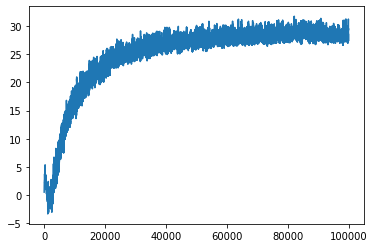

In [14]:
for j in range(10):
  sol = ski.solve(method='td',keep_result=True,epsilon_greedy='decayed',seed=1234)
  
  print(sol.opt_reward[(1,0)],sol.opt_action[(1,0)])

  visit = sol.visit[(1,0)]
  visit = [(key,visit[key]) for key in visit]
  visit.sort(key=lambda x: x[1],reverse=True)
  print(visit)

i = max([i for i in range(len(sol.y))],key=lambda i: sol.y[i])
print(i)
print(sol.y[i])
print(sol.a[i])

sol.plot()

## Solve with Q-learning

In [0]:
ski.td.initialize()

30.178746661289665 8
[(8, 1314), (9, 864), (7, 795), (10, 728), (6, 644), (11, 542), (12, 384), (13, 372), (18, 371), (5, 362), (2, 358), (4, 346), (1, 339), (15, 337), (19, 331), (14, 327), (0, 322), (16, 320), (17, 317), (3, 316), (20, 311)]
30.569392418194113 8
[(8, 3441), (9, 2827), (7, 1820), (10, 1560), (11, 1074), (6, 1027), (13, 681), (12, 661), (18, 566), (14, 561), (2, 559), (5, 542), (1, 537), (3, 536), (0, 532), (15, 521), (4, 521), (17, 518), (16, 517), (19, 500), (20, 499)]
30.626225716795673 9
[(9, 5304), (8, 4882), (10, 2931), (7, 2722), (11, 2110), (6, 1309), (12, 988), (13, 921), (14, 725), (2, 722), (18, 702), (5, 700), (3, 694), (1, 691), (15, 681), (20, 672), (4, 670), (17, 660), (0, 654), (16, 637), (19, 625)]
31.059490878162958 12
[(8, 7621), (9, 7108), (10, 4485), (11, 3169), (7, 3149), (6, 1501), (12, 1373), (13, 1250), (14, 917), (2, 852), (15, 821), (18, 818), (1, 808), (5, 799), (3, 793), (20, 786), (0, 763), (4, 761), (17, 754), (16, 738), (19, 734)]
30.094

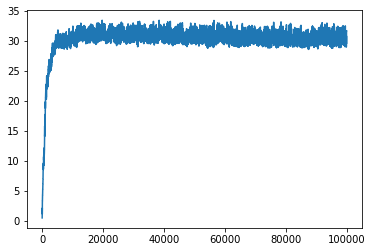

In [16]:
for j in range(10):
  sol = ski.solve(method='td',policy='off',keep_result=True,epsilon_greedy='decayed',seed=1234)
  
  print(sol.opt_reward[(1,0)],sol.opt_action[(1,0)])

  visit = sol.visit[(1,0)]
  visit = [(key,visit[key]) for key in visit]
  visit.sort(key=lambda x: x[1],reverse=True)
  print(visit)

i = max([i for i in range(len(sol.y))],key=lambda i: sol.y[i])
print(i)
print(sol.y[i])
print(sol.a[i])

sol.plot()